<a href="https://colab.research.google.com/github/ketanp23/sit-neuralnetworks-class/blob/main/Wiener_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transforms to frequency domain, estimates filter, applies it. Output is smoother, closer to original sine.

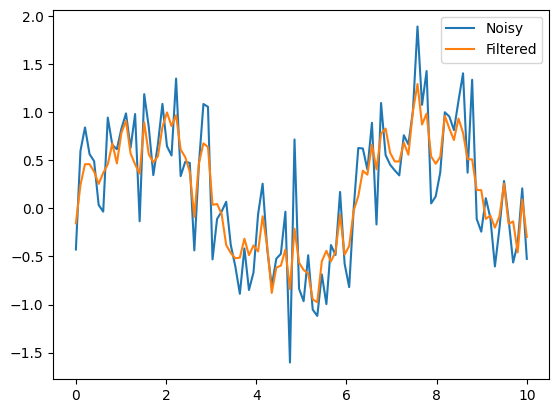

First 5 filtered values: [-0.15634718  0.24228     0.45833346  0.45881062  0.38104602]


In [2]:
import numpy as np
import matplotlib.pyplot as plt  # For plotting, optional

# Generate data
t = np.linspace(0, 10, 100)
signal = np.sin(t)  # True signal
noise = np.random.normal(0, 0.5, len(t))  # Gaussian noise
noisy = signal + noise  # Noisy input

# Simple Wiener filter: Assume we know signal power S and noise power N
# In freq domain for simplicity (FFT-based)
fft_noisy = np.fft.fft(noisy)
power_noisy = np.abs(fft_noisy)**2 / len(t)
power_signal_est = np.maximum(power_noisy - np.mean(noise**2), 0)  # Estimate S = |Y|^2 - N
wiener_filter = power_signal_est / power_noisy  # H = S / (S + N)
fft_filtered = fft_noisy * wiener_filter
filtered = np.fft.ifft(fft_filtered).real

# Plot (optional)
plt.plot(t, noisy, label='Noisy'); plt.plot(t, filtered, label='Filtered'); plt.legend(); plt.show()

print("First 5 filtered values:", filtered[:5])  # Close to sin(t